<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Logement </h1>
</div>

> Construire un modèle de régression à l'aide de l'API/ Mlflow

Pour mettre en œuvre des réseaux de neurones en utilisant Keras API. Il s'agit d'une API de haut niveau magnifiquement conçue et simple pour la construction, former, évaluer et faire fonctionner des réseaux de neurones.

Pour s'initier à l'API,  vous  allez entraîner un modèle de régression afin de prédire le prix médian des maisons de la Californie. Ensuite, vous déploierez ce modèle à travers une API REST en utilisant la librairie  MLflow.

<div style="display: flex; background-color: blue;" >

# 1.Contexte du projet
</div>

C’est un projet sur le logement en Californie dans le but de prédire le prix médian des maisons de la Californie. Pour plus de simplicité, vous allez utiliser la fonction fetch_california_housing() de Scikit-Learn pour charger les données. Cet ensemble de données est plus simple que celui que nous avons utilisé auparavant, puisqu'il ne contient que des caractéristiques numériques (il n'y a pas la variable ocean_proximity), et il y a pas des valeurs manquantes . (Le choix du modèle n'est pas très important pour ce projet, mais essayez d’aborder le sujet à l'aide d’un modèle ensembliste)

- Entraîner un modèle de régression afin de prédire le prix médian des maisons de la Californie.
- Ensuite, appliquer ce modèle à travers une API REST en utilisant la librairie Mlflow.
- Finalement, tester vos prédictions avec une interface Streamlit.

## Ressources :
- https://openclassrooms.com/fr/courses/4525361-realisez-un-dashboard-avec-vos-donnees/5774786-apprehendez-le-fonctionnement-dun-serveur-web
- https://openclassrooms.com/fr/courses/6573181-adoptez-les-api-rest-pour-vos-projets-web
- https://practicalprogramming.fr/api-rest/
- https://www.mlflow.org/docs/latest/index.html
- https://docs.microsoft.com/fr-fr/azure/databricks/applications/mlflow/
- https://streamlit.io/
- https://docs.microsoft.com/fr-fr/azure/databricks/_static/notebooks/mlflow/mlflow-quick-start-deployment-azure.html

<div style="display: flex; background-color: green;" >

## 1.2. Util
</div>

Créer une API Python :
- ``Django`` : Django est basé sur Python. Il est utilisé par de grands noms comme Google, YouTube et Instagram. Le framework REST de Django est facile à utiliser lorsque vous construisez vos API REST avec Django. Il demande un effort d’apprentissage aux débutants, mais possède d’excellentes fonctionnalités intégrées, comme l’authentification et la messagerie. - https://openclassrooms.com/fr/courses/7192416-mettez-en-place-une-api-avec-django-rest-framework
- ``Flask`` : Flask utilise Python pour le web et le développement des API REST. C’est un framework minimaliste, facile d’apprentissage et d’utilisation. Flask comprend moins de fonctionnalités intégrées que Django, mais permet aux développeurs d’avoir davantage de choix dans les outils additionnels qu’ils utilisent.

In [1]:
from os import getcwd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from api_logement_function import *
from sklearn.datasets import fetch_california_housing
import datetime

<div style="display: flex; background-color: blue;" >

# 2.Chargement des données
</div>

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False

# Récupère le répertoire du programme
file_path = getcwd() + "\\"

print(f"Current execution path : {file_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_api_logement\


In [3]:
california_housing = fetch_california_housing(as_frame=True)
df_california_housing = california_housing.data
target = california_housing.target
df_california_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [5]:
target.isna().sum()

0

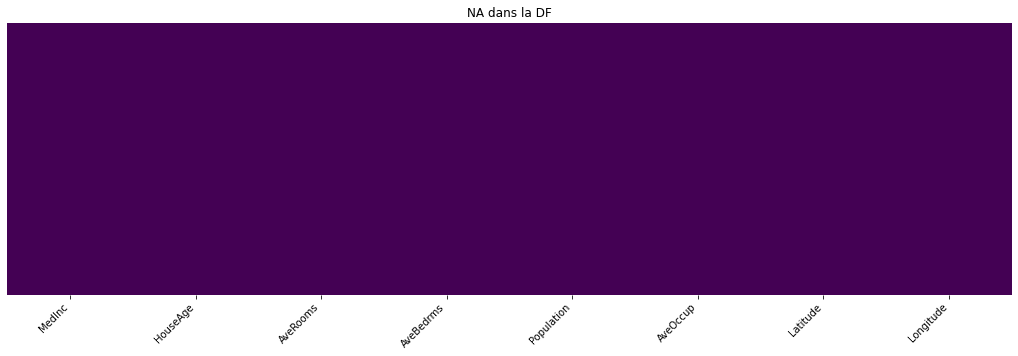

In [6]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_california_housing.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: green;" >

## 2.1. Modeling
</div>


<div style="display: flex; background-color: indigo;" >

#### Split train / test
</div>

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
random_state=0

In [9]:
# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(df_california_housing,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=random_state)

<div style="display: flex; background-color: indigo;" >

#### Train the model
</div>

In [10]:
models_list = { }

In [18]:
grid_params = { 'randomforestregressor__n_estimators' : [91],
                        'randomforestregressor__max_features' : ['auto', 'sqrt']
                        }
grid_pipeline = make_pipeline( RandomForestRegressor(random_state=random_state))
grid = GridSearchCV(grid_pipeline,param_grid=grid_params, cv=4)
models_list["Forest"] = grid

In [19]:
modeldic, scores = fit_and_test_models(models_list, X_train, y_train, X_test, y_test, y_column_name=None, scores=None, verbose=verbose, metrics=1)

score_all_class_df = pd.DataFrame(scores).set_index("Modeli")
score_all_class_df = score_all_class_df.round(decimals=3)
score_all_class_df

,Class,Model,R2,fit time,fit seconde,metrics time,metrics seconde,predict time,predict seconde,MAE,MSE,RMSE,Mediane AE
Modeli,,,,,,,,,,,,,
Forest,,Forest,0.817,00:00:27,27.233,00:00:00,0.079,00:00:00,0.079,0.331,0.239,0.489,0.224


In [20]:
print("Forest :",modeldic['Forest'].best_params_)

Forest : {'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__n_estimators': 91}


<div style="display: flex; background-color: indigo;" >

#### Sauvegarde du modèle entrainé
</div>

In [21]:
from joblib import dump, load
from datetime import datetime

In [25]:
def save_model(model_to_save, file_path, model_save_file_name):
    # Sauvegarde du meilleur modele
    now = datetime.now() # current date and time
    date_time = now.strftime("%Y-%m-%d-%H_%M_%S")
    model_save_file_name = model_save_file_name + date_time + '.joblib'
    # Attention, il faudra mettre à jour les colonnes correspondantes dans le premier if en cas de modification du model
    dump(model_to_save, file_path+model_save_file_name)
    return file_path+model_save_file_name

In [23]:
from os import path
def load_model(model_save_path):
    if path.exists(model_save_path) and path.isfile(model_save_path):
        # Chargement du modèle pré-entrainer
        return load(model_save_path)
        

In [32]:
model_to_save = modeldic.get('Forest', None)

# On sauvegarde uniquement le modèle le plus performant et non le GridSearchCV
if isinstance( model_to_save, GridSearchCV):
    model_to_save = model_to_save.best_estimator_
    print(type(model_to_save))

model_path = save_model(model_to_save, file_path, model_save_file_name='Forest_')
model_path

<class 'sklearn.pipeline.Pipeline'>


'c:\\Users\\User\\WORK\\workspace-ia\\PROJETS\\projet_api_logement\\Forest_2022-05-05-10_29_03.joblib'

<div style="display: flex; background-color: indigo;" >

#### Chargement du modèle entrainé
</div>

In [33]:
# model_path = file_path + "ema_lannuontimes_saved_model_2022-03-29-09_22_16.joblib"

# Chargement du modèle si non chargé
saved_model_titi = load_model(model_path)
print(type(saved_model_titi))
saved_model_titi

<class 'sklearn.pipeline.Pipeline'>


Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', n_estimators=91,
                                       random_state=0))])

<div style="display: flex; background-color: green;" >

## 2.1. Titre 2
</div>


<div style="display: flex; background-color: indigo;" >

#### Titre 3
</div>

<div style="display: flex; background-color: deeppink;" >

##### Titre4
</div>

<div style="display: flex; background-color: blue;" >

# 2.Titre 1
</div>

<div style="display: flex; background-color: green;" >

## 2.1. Titre 2
</div>


<div style="display: flex; background-color: indigo;" >

#### Titre 3
</div>

<div style="display: flex; background-color: deeppink;" >

##### Titre4
</div>

<div style="display: flex; background-color: coral;" >

##### Titre 5
</div>

<div style="display: flex; background-color: blue;" >

# ANNEXE
</div>